In [10]:
# Import NS package

from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# tenors (maturities)
tenors = np.array([0.0,0.5,0.75,1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0])

# yields, assume the following market rates, upward-sloping curve
yields = np.array([0.01,0.02,0.025,0.029,0.03,0.033,0.036,0.039,0.04,0.043,0.045,0.047,0.049])

In [12]:
# Step 1. Calibration. Parametric fitting of the curve is referred to as another kind of calibraiton

curve_NS, status = calibrate_ns_ols(tenors, yields) # Nelson-Siegel parametric fitting of the curve

curve_NSS, status_NSS = calibrate_nss_ols(tenors, yields)  # Nelson-Siegel-Svensson fitting

In [13]:
print("------------------------------")
print("Nelson-Siegel calibrated parameters line:\n")
print(curve_NS)

print("------------------------------")
print("Nelson-Siegel-Svensson calibrated parameters line:\n")
print(curve_NSS)

------------------------------
Nelson-Siegel calibrated parameters line:

NelsonSiegelCurve(beta0=0.05011977772964896, beta1=-0.03840084066381676, beta2=-0.0009538354321585318, tau=0.9698048108671457)
------------------------------
Nelson-Siegel-Svensson calibrated parameters line:

NelsonSiegelSvenssonCurve(beta0=0.14981799721717334, beta1=-0.138224186375146, beta2=0.05254029262301986, beta3=-0.2766419126037742, tau1=2.0, tau2=5.0)


In [14]:
# Step 2. Fitting from ready parameters, NSS function deserves exploration
# A curve is fitted to full 50Y horizon, comparable to EUR swaps ASIRSEUR50Y30A06L

y = NelsonSiegelSvenssonCurve(0.149818, -0.138224, 0.0525403, -0.276642, 2.0, 5.0 )
t = np.linspace(0, 50, 100)

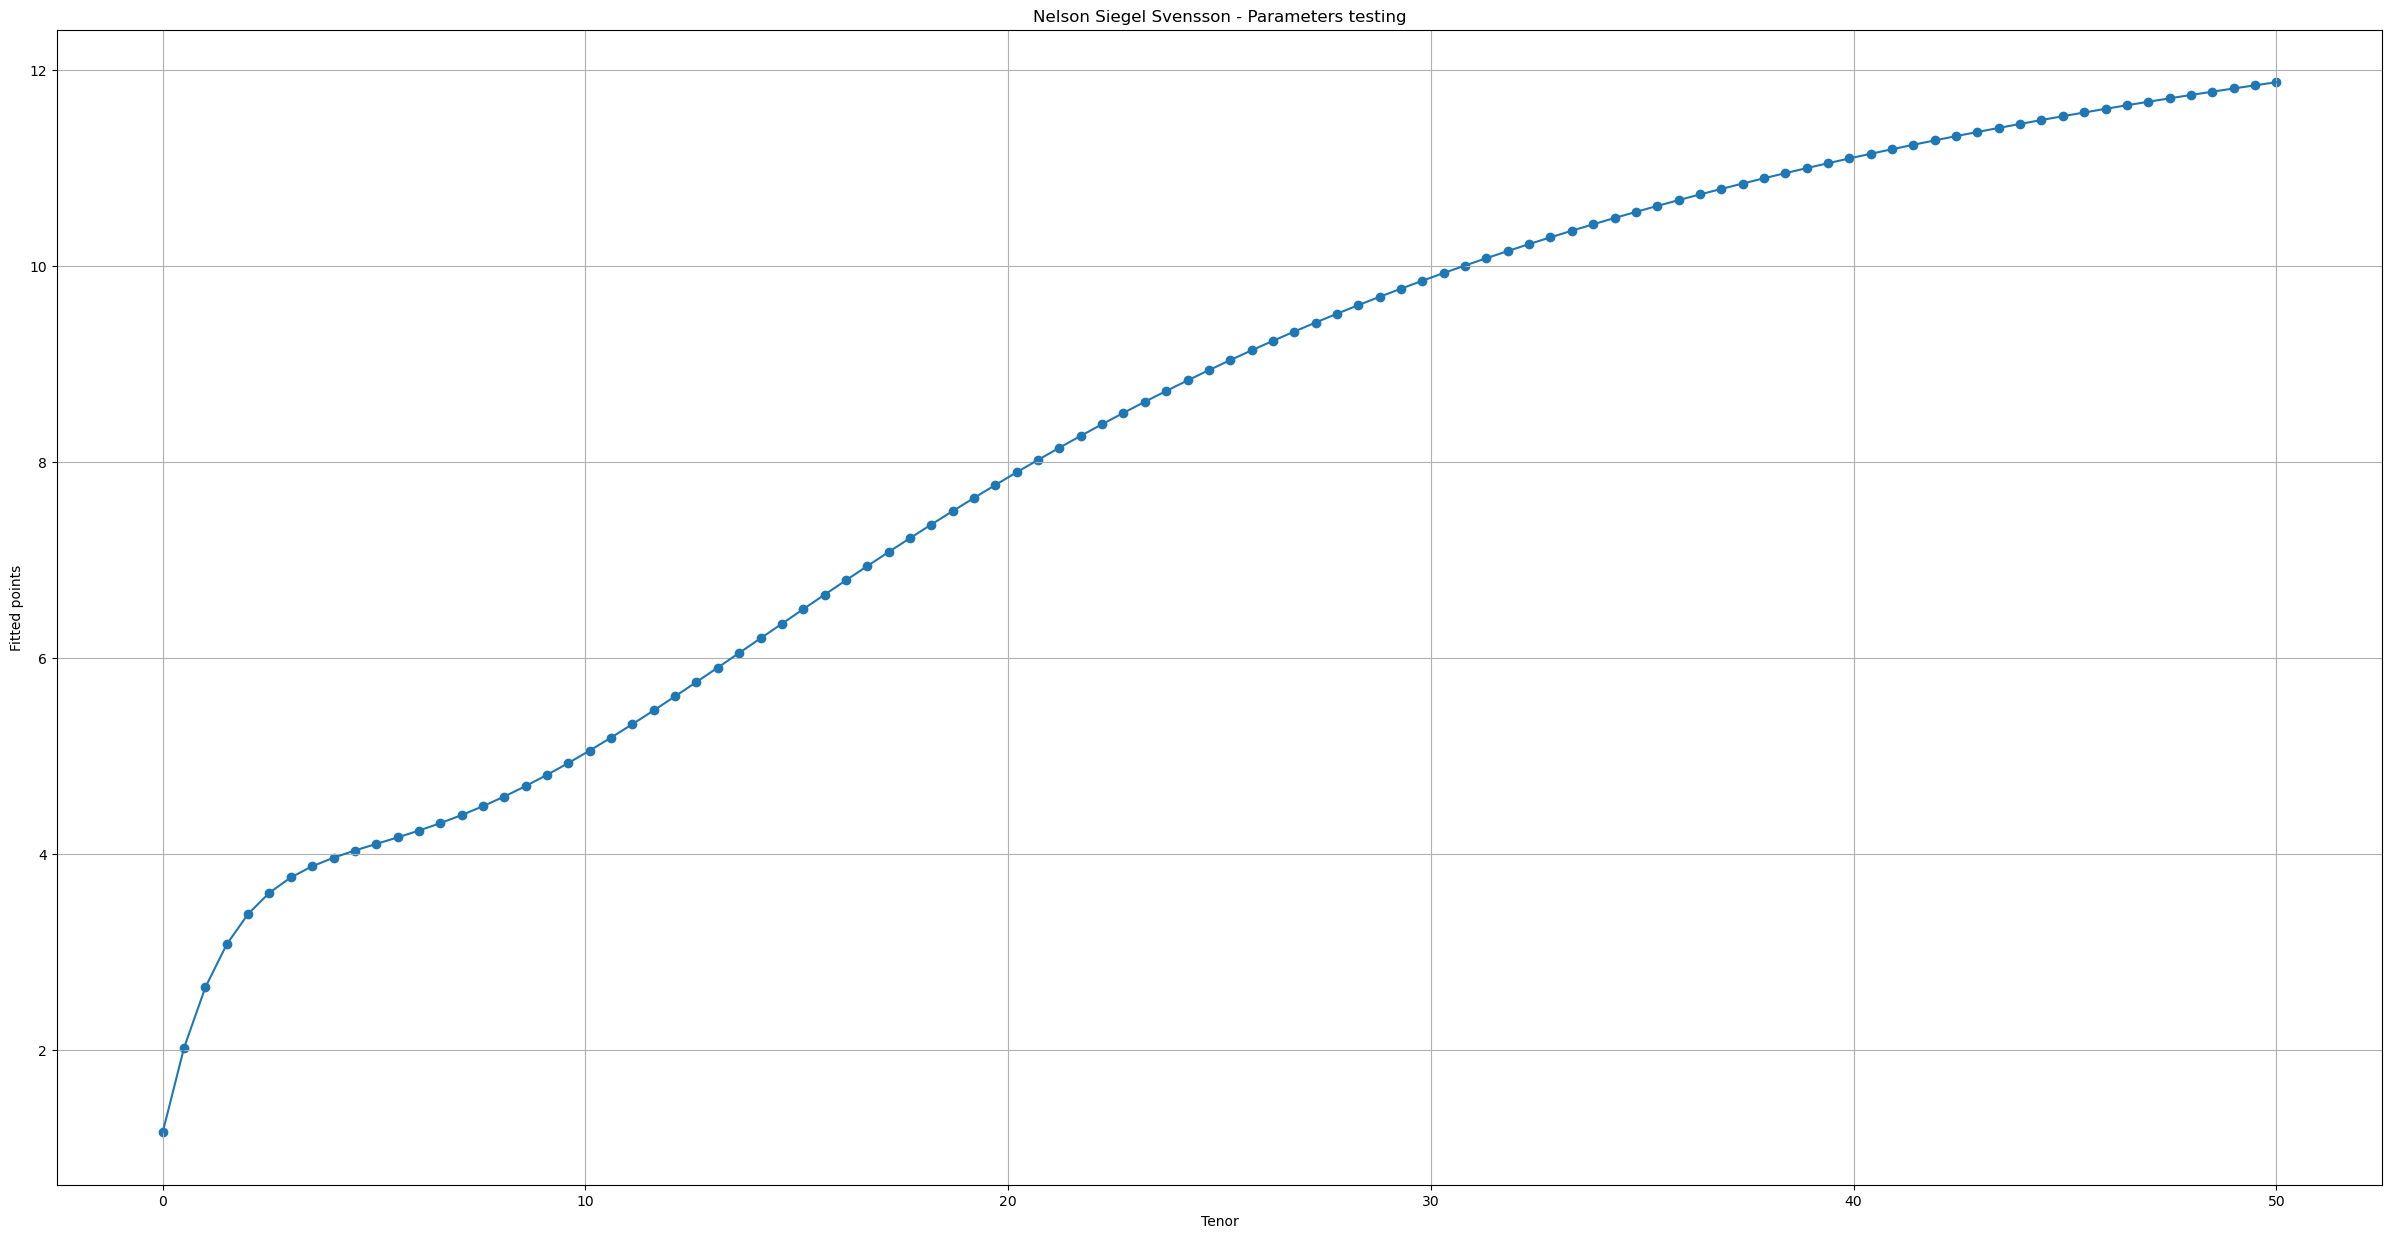

In [15]:
plt.figure(figsize=(30, 15))  # Width and height

plt.title('Nelson Siegel Svensson - Parameters testing')
plt.scatter(t, y(t)*100)
plt.plot(t, y(t)*100)
plt.xlabel('Tenor')
plt.ylabel('Fitted points')
plt.grid()
plt.show()

In [16]:
ZC_NS = NelsonSiegelCurve.zero(curve_NS, tenors)
Fwd_NS = NelsonSiegelCurve.forward(curve_NS, tenors)

In [17]:
ZC_NSS = NelsonSiegelSvenssonCurve.zero(curve_NSS, tenors)
Fwd_NSS = NelsonSiegelSvenssonCurve.forward(curve_NSS, tenors)

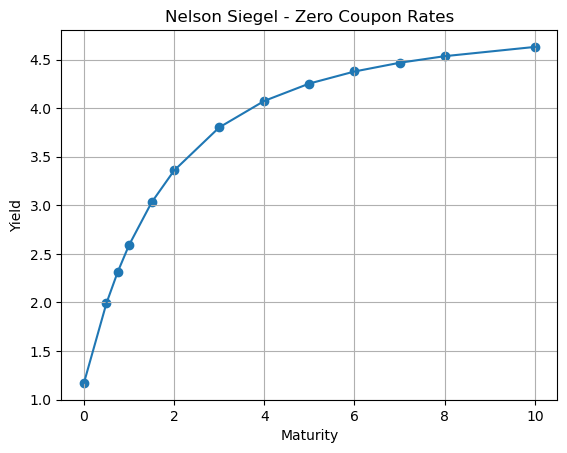

In [18]:
# Visualize ZC curve for NS parametric fitting
plt.title('Nelson Siegel - Zero Coupon Rates')
plt.scatter(tenors, ZC_NS*100)
plt.plot(tenors, ZC_NS*100)
plt.xlabel('Maturity')
plt.ylabel('Yield')
plt.grid()
plt.show()

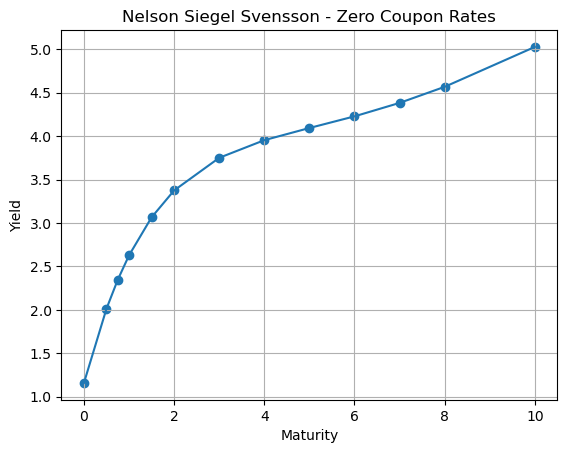

In [19]:
# Visualize ZC curve for NSS parametric fitting
plt.title('Nelson Siegel Svensson - Zero Coupon Rates')
plt.scatter(tenors, ZC_NSS*100)
plt.plot(tenors, ZC_NSS*100)
plt.xlabel('Maturity')
plt.ylabel('Yield')
plt.grid()
plt.show()

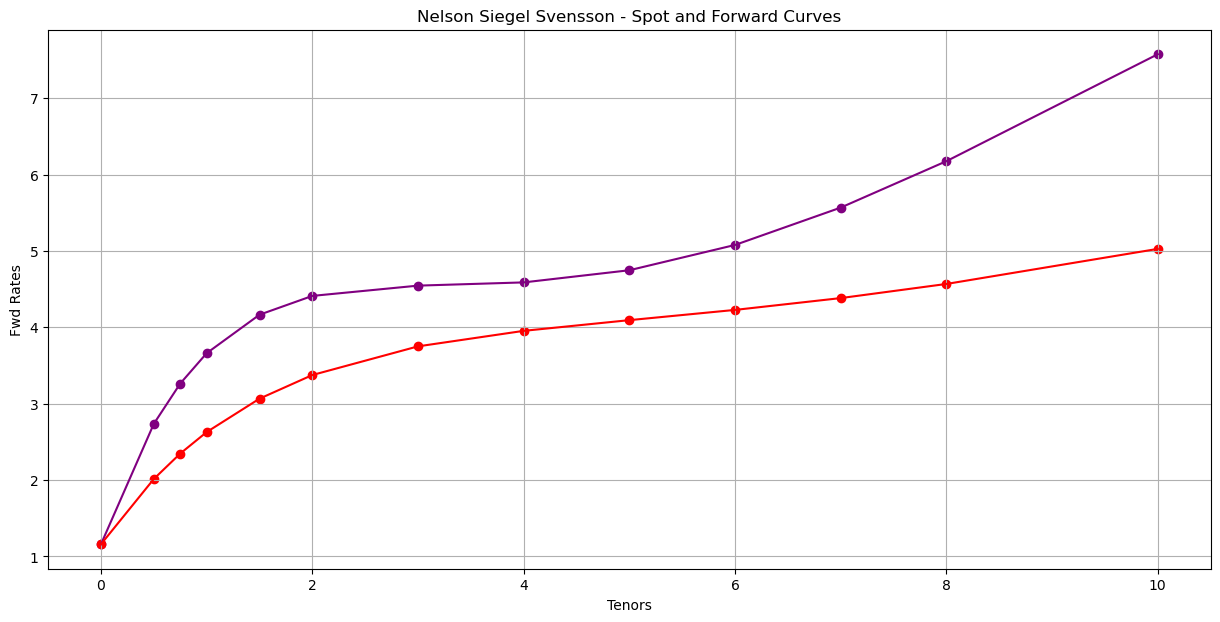

In [20]:
# Compare Spot and Forward Curves

plt.figure(figsize=(15, 7)) 

plt.title('Nelson Siegel Svensson - Spot and Forward Curves')

plt.scatter(tenors, Fwd_NSS*100, c="purple")
plt.plot(tenors, Fwd_NSS*100, c="purple")

plt.scatter(tenors, ZC_NSS*100, c="red")
plt.plot(tenors, ZC_NSS*100, c="red")

plt.xlabel('Tenors')
plt.ylabel('Fwd Rates')
plt.grid()
plt.show()